<a href="https://colab.research.google.com/github/lambda0xff/android-architecture-samples/blob/main/05_Computer_vision_and_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
Computer vision: writing algorithms that can discover patterns in visual data. 

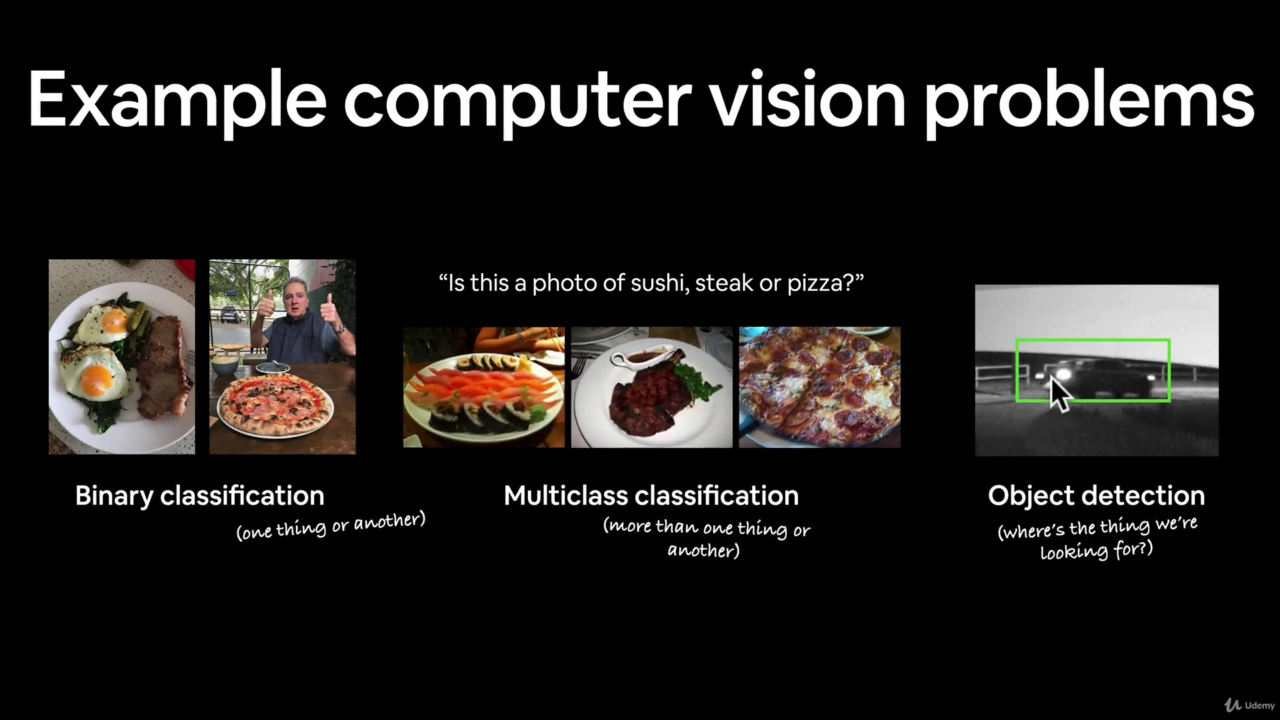

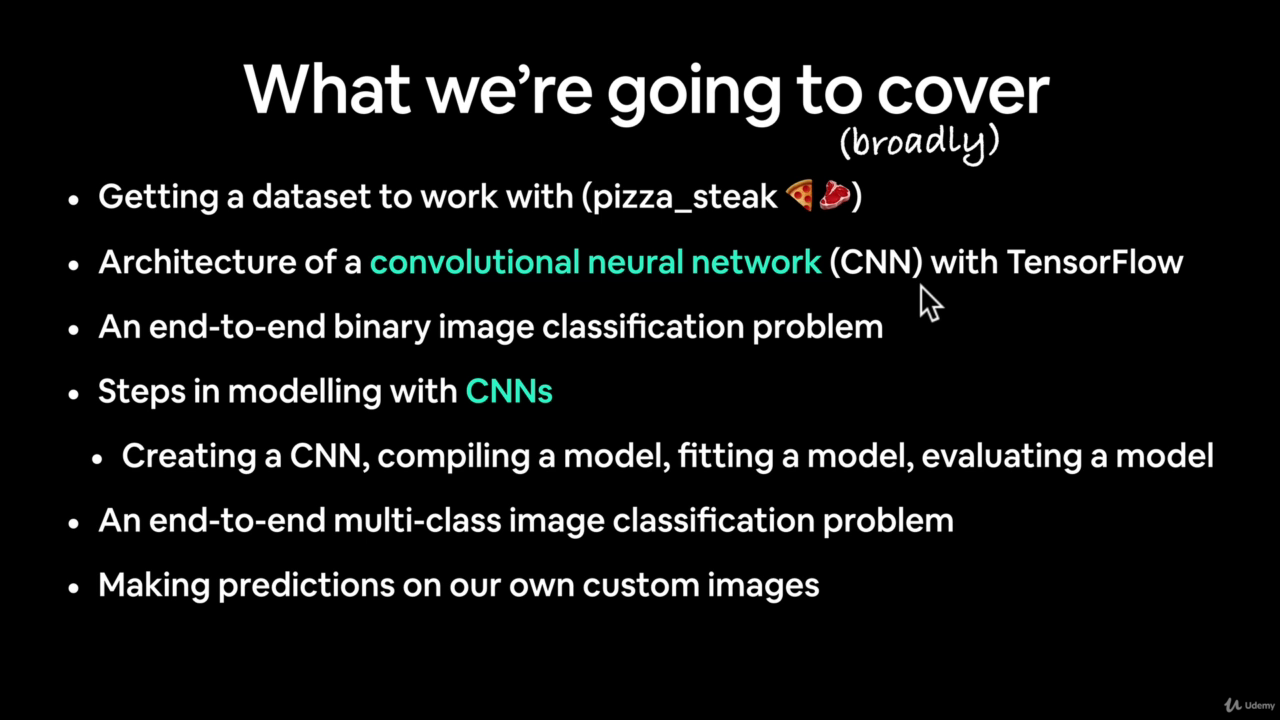

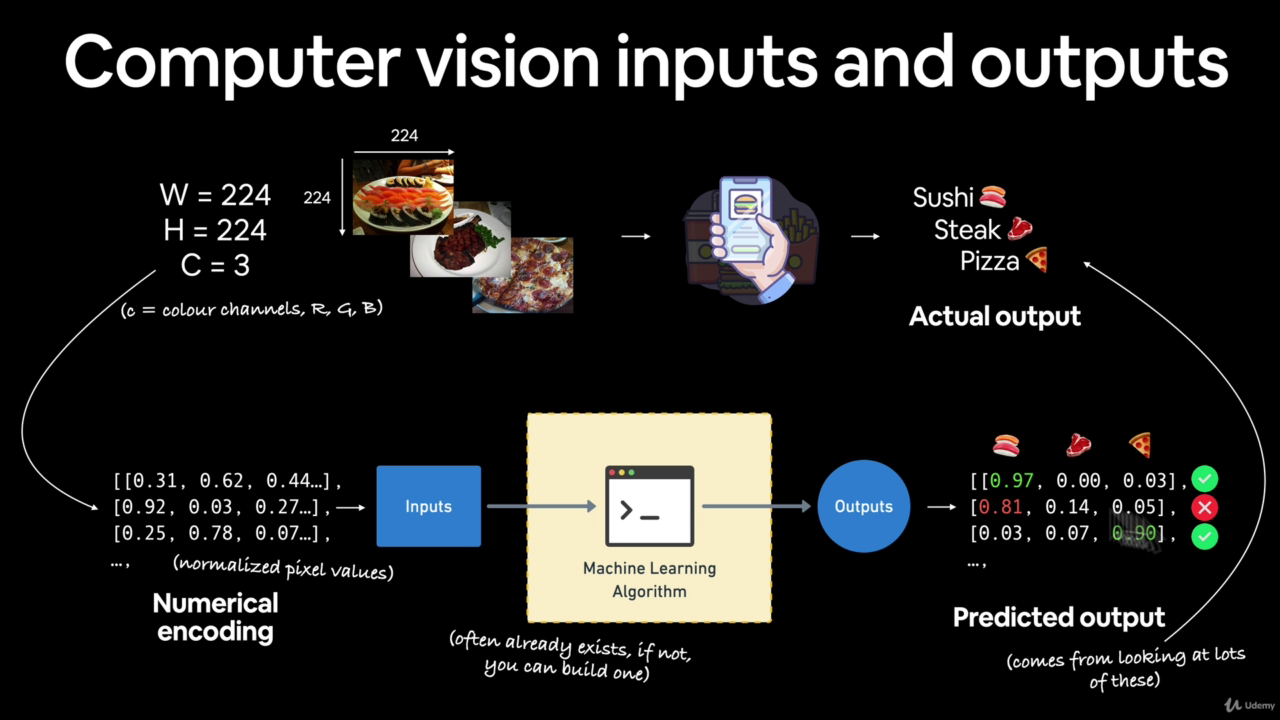

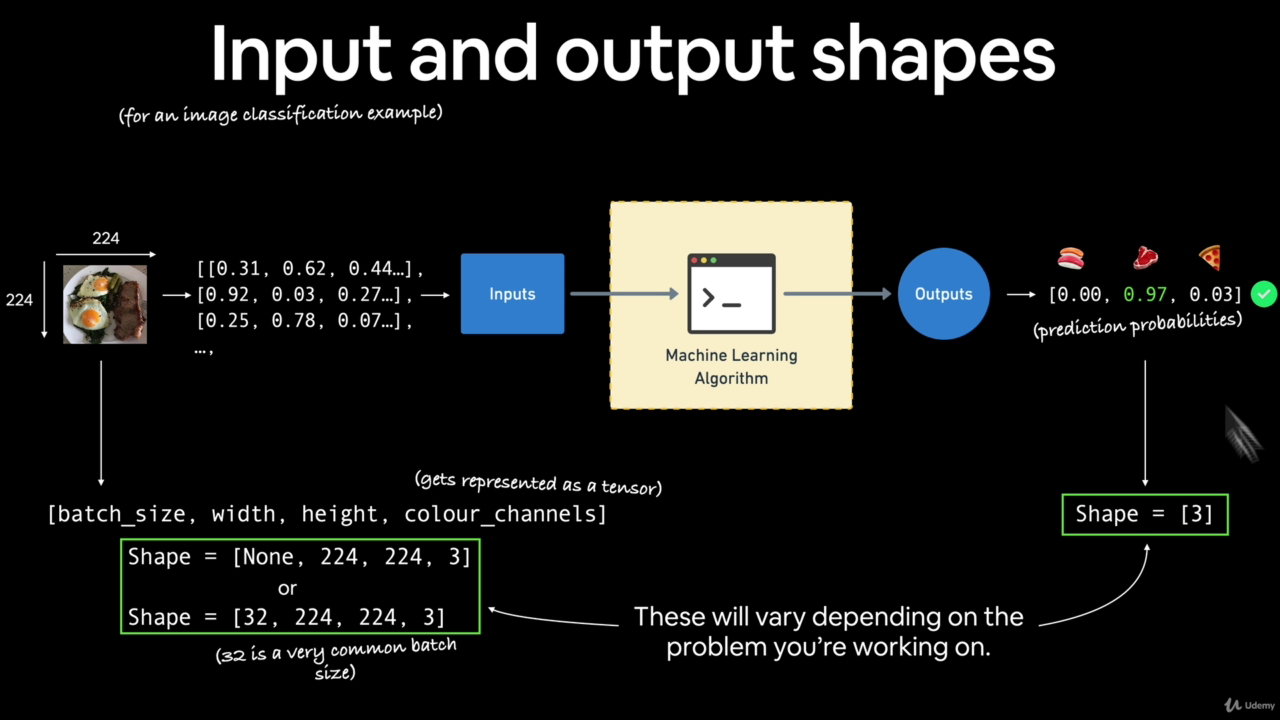

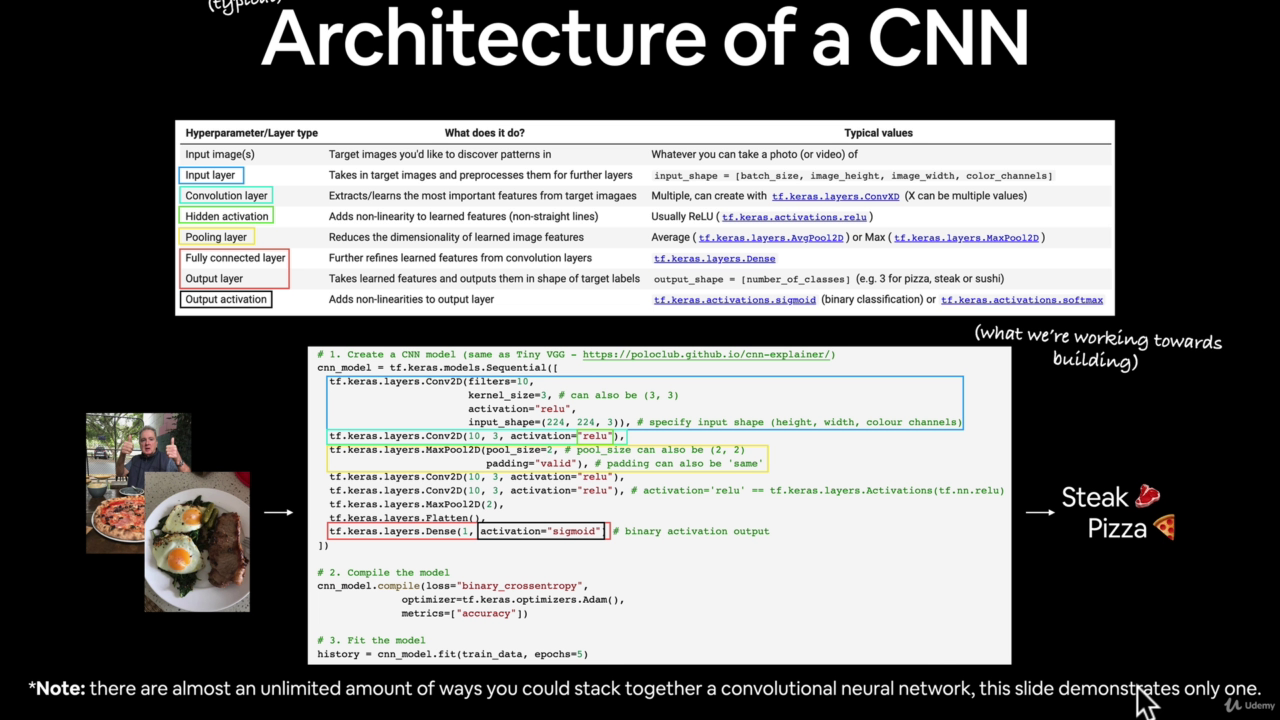

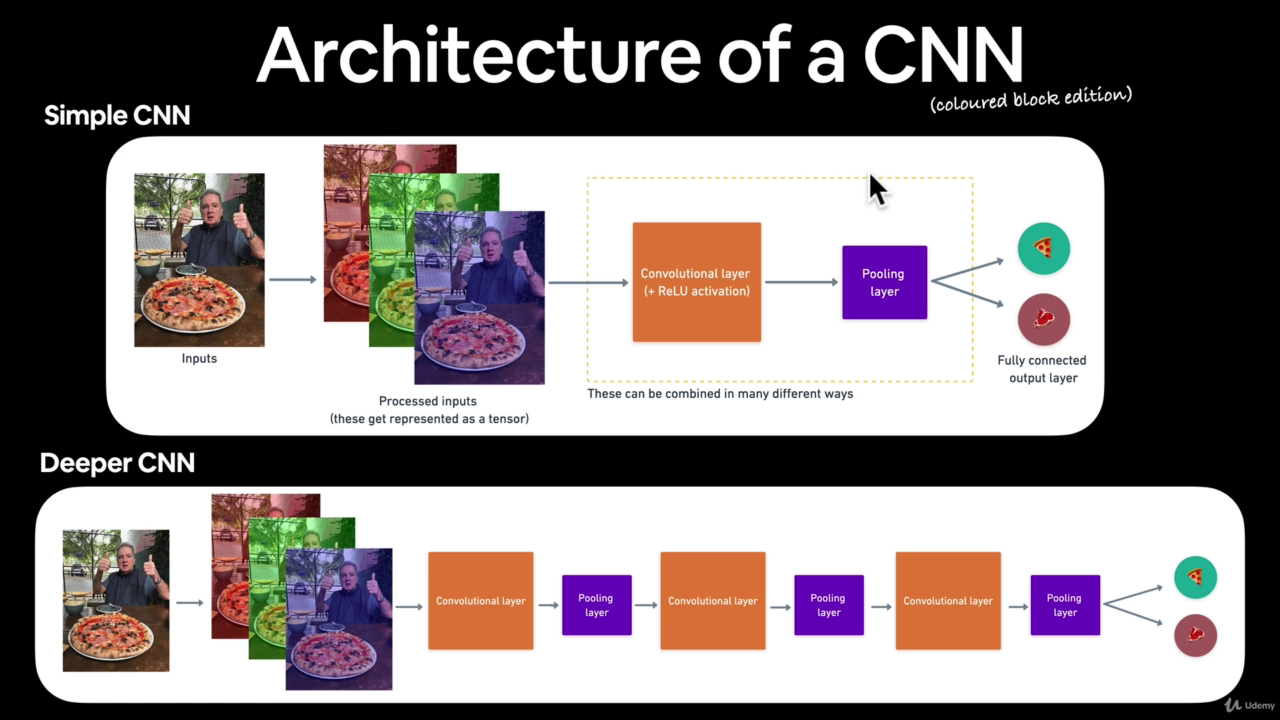

# Code

## Data

In [ ]:
# import zipfile

# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# zip_ref = zipfile.ZipFile("pizza_steak.zip")
# zip_ref.extractall()
# zip_ref.close()

In [ ]:
# import os
# for dirpath, dirnames, filenames in os.walk("pizza_steak"):
#   print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [ ]:
# import pathlib
# import numpy as np

# data_dir = pathlib.Path("pizza_steak/train")
# class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # [pizza, steak]

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # set the target directory
  target_folder = target_dir + "/" + target_class

  # get one random image path
  random_image = random.sample(os.listdir(target_folder), 1)[0]

  # read and plot image
  img = mpimg.imread(target_folder + "/" + random_image)

  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # Show the shape of the image

  return img # returns the image as an array of integers

Image shape: (512, 512, 3)


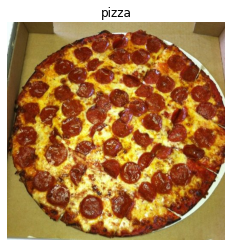

In [ ]:
img = view_random_image(target_dir="pizza_steak/train",
                        target_class="pizza")

In [ ]:
import tensorflow as tf

img = tf.constant(img) # convert img into a tensor (shape of [512, 512, 3])

NameError: ignored

## The CNN
1. load images
2. preprocess the images
3. build a cnn
4. compile the cnn
5. evaluate the cnn
6. improve the cnn

### Load & preprocess images

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

# define normalization functions
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir  = "pizza_steak/test"

# import data from directories and turn them into batches of augmented images
train_data = train_datagen.flow_from_directory(
    directory   = train_dir,  
    batch_size  = 32, 
    target_size = (224, 224), 
    class_mode  = "binary", 
    seed        =  42
)

valid_data = valid_datagen.flow_from_directory(
    directory   = test_dir,  
    batch_size  = 32, 
    target_size = (224, 224), 
    class_mode  = "binary", 
    seed        =  42
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


### Build the CNN

In [ ]:
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=1, activation="sigmoid")
])

model_1.compile(
    loss      = "binary_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics   = ["accuracy"]
)

history_1 = model_1.fit(
    train_data, 
    epochs           = 5, 
    steps_per_epoch  = len(train_data),
    validation_data  = valid_data,
    validation_steps = len(valid_data)
)

Epoch 1/5
47/47 [==============================] - 90s 2s/step - loss: 0.5538 - accuracy: 0.7020 - val_loss: 0.4163 - val_accuracy: 0.8200
Epoch 2/5
47/47 [==============================] - 89s 2s/step - loss: 0.4304 - accuracy: 0.8020 - val_loss: 0.3353 - val_accuracy: 0.8780
Epoch 3/5
47/47 [==============================] - 88s 2s/step - loss: 0.3759 - accuracy: 0.8347 - val_loss: 0.3200 - val_accuracy: 0.8720
Epoch 4/5
47/47 [==============================] - 88s 2s/step - loss: 0.3626 - accuracy: 0.8380 - val_loss: 0.2982 - val_accuracy: 0.8940
Epoch 5/5
47/47 [==============================] - 88s 2s/step - loss: 0.3191 - accuracy: 0.8660 - val_loss: 0.3048 - val_accuracy: 0.8800
